In [1]:
import pandas as pd
df =  pd.read_csv("Reviews.csv")
df

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...,...,...,...,...,...
568449,568450,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,0,0,5,1299628800,Will not do without,Great for sesame chicken..this is a good if no...
568450,568451,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,0,0,2,1331251200,disappointed,I'm disappointed with the flavor. The chocolat...
568451,568452,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",2,2,5,1329782400,Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568452,568453,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",1,1,5,1331596800,Favorite Training and reward treat,These are the BEST treats for training and rew...


In [2]:
df.head(10)
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      568454 non-null  int64 
 1   ProductId               568454 non-null  object
 2   UserId                  568454 non-null  object
 3   ProfileName             568428 non-null  object
 4   HelpfulnessNumerator    568454 non-null  int64 
 5   HelpfulnessDenominator  568454 non-null  int64 
 6   Score                   568454 non-null  int64 
 7   Time                    568454 non-null  int64 
 8   Summary                 568427 non-null  object
 9   Text                    568454 non-null  object
dtypes: int64(5), object(5)
memory usage: 43.4+ MB


In [4]:
df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09


In [5]:
df.columns = df.columns.str.strip()
df.shape

(568454, 10)

In [6]:
df = df.dropna(subset=['Text'])
df.shape

(568454, 10)

<Axes: ylabel='Score'>

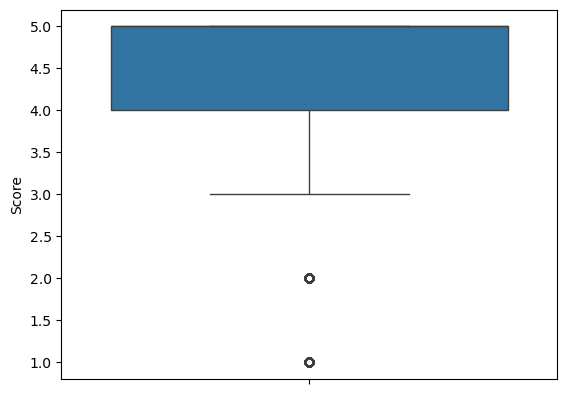

In [7]:
import seaborn as sns
sns.boxplot(df.Score)

<Axes: >

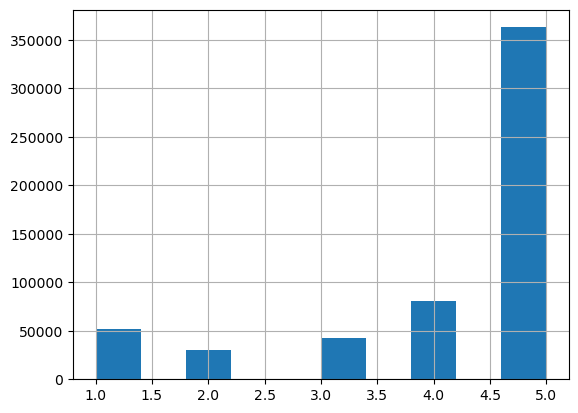

In [8]:
df.Score.hist()

In [9]:
from textblob import TextBlob
def get_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Text'].apply(get_sentiment)

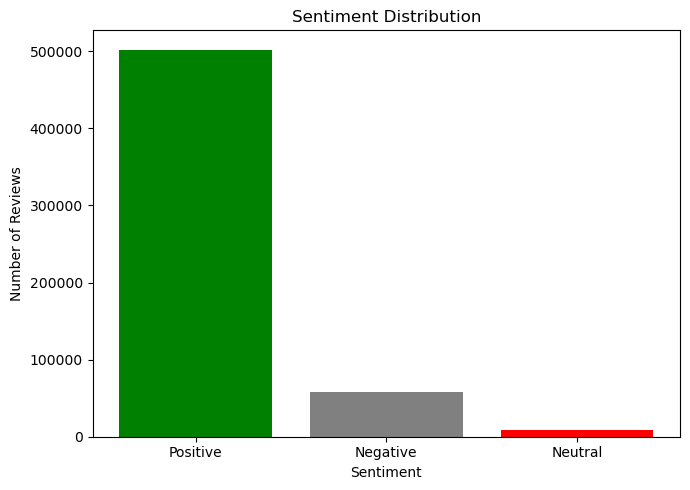

In [10]:
import matplotlib.pyplot as plt

# Count each sentiment
sentiment_counts = df['Sentiment'].value_counts()

# Plot using matplotlib
plt.figure(figsize=(7, 5))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.tight_layout()
plt.show()


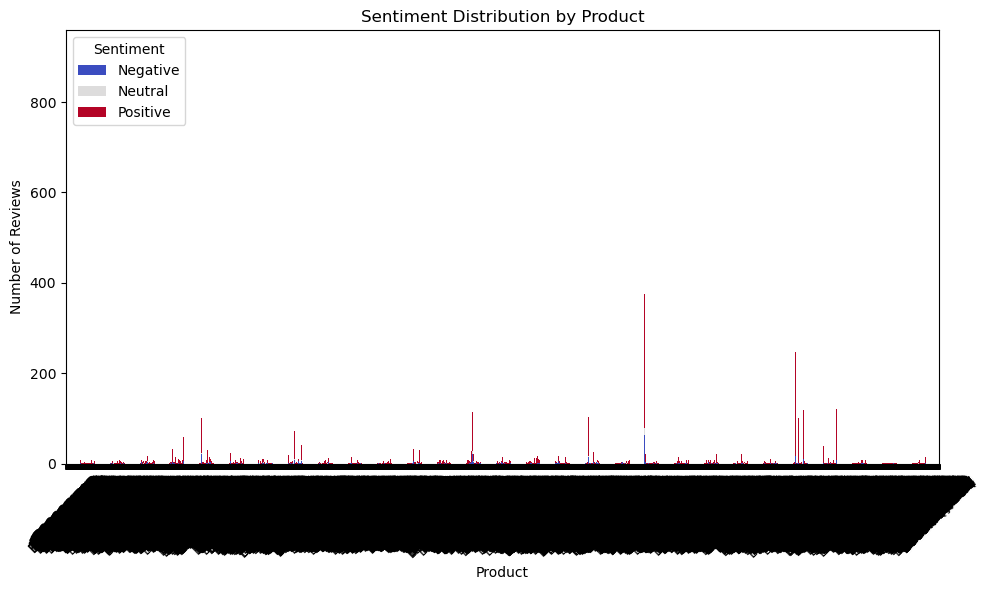

In [11]:
product_sentiments = df.groupby(['ProductId', 'Sentiment']).size().unstack()

product_sentiments.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title('Sentiment Distribution by Product')
plt.xlabel('Product')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
# Function to assess if a product is considered "best"
def is_product_best(product_name):
    product_reviews = df[df['ProductId'] == product_name]
    if product_reviews.empty:
        print(f"No reviews found for product: {product_name}")
        return
    sentiment_counts = product_reviews['Sentiment'].value_counts()
    positive_reviews = sentiment_counts.get('Positive', 0)
    total_reviews = sentiment_counts.sum()
    positive_ratio = positive_reviews / total_reviews
    print(f"Product: {product_name}")
    print(f"Total Reviews: {total_reviews}")
    print(f"Positive Reviews: {positive_reviews}")
    print(f"Positive Review Ratio: {positive_ratio:.2f}")
    if positive_ratio >= 0.7:
        print("✅ This product is considered 'Best' based on reviews.")
    else:
        print("❌ This product is not considered 'Best' based on reviews.")

# Example usage
is_product_best("B001E4KFG0")


Product: B001E4KFG0
Total Reviews: 1
Positive Reviews: 1
Positive Review Ratio: 1.00
✅ This product is considered 'Best' based on reviews.
